In [77]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\av.ivanov\AppData\Local\Continuum\anaconda3\pkgs\proj4-5.2.0-h6538335_1006\Library\share'
print(os.getcwd())
os.chdir(r"D:\Jupyter\WRF_Kara_gate")
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import math as m
from wrf import getvar, interplevel, ALL_TIMES, CoordPair, interpline, vertcross, to_np

def nearest(lst, target): #print(nearest(l, 53))
  min_val = min(lst, key=lambda x: abs(x-target))
  return np.min(np.where(lst == min_val))

def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = './{}'.format(fmt)
    #if not os.path.exists(iPath):
    #    os.mkdir(iPath)
    #os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png',dpi=300,bbox_inches='tight') #figsize=(600,800) #,transparent=True
    os.chdir(pwd)
    #plt.close()
    
def write_fo_file(name,my_list):
    with open(name, 'w') as f:
        for item in my_list:
            f.write("%s\n" % item)

D:\Jupyter\WRF_Kara_gate


In [80]:
fh.close()

In [79]:
Area = 'Kara_gate'
Domain = 'd01'
NetCDF_file = 'wrfout_' + Domain + '_2013-07-03_00_00_00'
fh = Dataset(NetCDF_file, mode='r+')
Pic_name = Area + Domain
times = fh.variables['Times']
t_Num  = len(times[:,1]);
#print(fh.variables['XLONG'])

In [81]:
for i in np.arange(1,9,2):
    ncfile = Dataset('wrfout_' + Domain + '_2013-07-0' + str(i) + '_00_00_00', mode='r+');
    if (i == 1):
        w10 = getvar(ncfile,"uvmet10_wspd_wdir",timeidx=ALL_TIMES,meta=False);
        uv10 = getvar(fh,"uvmet10",timeidx=ALL_TIMES,meta=False);
        T2 = getvar(ncfile,"T2",timeidx=ALL_TIMES,meta=False) - 273.15; # Temperature in Celsius in 2 m
        PSFC = getvar(ncfile,"PSFC",timeidx=ALL_TIMES,meta=False); # Surface pressure
        full_hours = getvar(ncfile,"xtimes",timeidx=ALL_TIMES,meta=False)/60;
        lon = (ncfile.variables['XLONG'])[0,:,:];
        lat = (ncfile.variables['XLAT'])[0,:,:];
        H = getvar(ncfile,"ter",meta=False); # Model Terrain Height
    else:
        w10 = np.append(w10, getvar(ncfile,"uvmet10_wspd_wdir",timeidx=ALL_TIMES,meta=False), axis=1);
        uv10 = np.append(uv10, getvar(ncfile,"uvmet10",timeidx=ALL_TIMES,meta=False), axis=1);
        T2 = np.append(T2, getvar(ncfile,"T2",timeidx=ALL_TIMES,meta=False) - 273.15, axis=0);
        PSFC = np.append(PSFC, getvar(ncfile,"PSFC",timeidx=ALL_TIMES,meta=False), axis=0);
        full_hours = np.append(full_hours, getvar(ncfile,"xtimes",timeidx=ALL_TIMES,meta=False)/60);
    print(w10.shape);
    ncfile.close();
    

(2, 48, 44, 74)
(2, 96, 44, 74)
(2, 144, 44, 74)
(2, 192, 44, 74)


In [82]:
print(uv10.shape)
print(np.min(lon),np.max(lon));
print(np.min(lat),np.max(lat));

(2, 192, 44, 74)
50.40104 69.59896
67.97406 71.84654


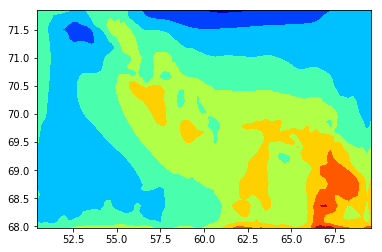

In [185]:
plt.contourf(lon,lat,uv10[0,1,:],cmap='jet')

In [141]:
Nx = 715;
Ny = 456;
grid_path = "Grid/";
Lon = np.reshape(np.fromfile(grid_path + "Lon.dat", dtype=float, count=-1, sep=''),(Nx,Ny))#[:,0];
Lat = np.reshape(np.fromfile(grid_path + "Lat.dat", dtype=float, count=-1, sep=''),(Nx,Ny))#[0,:];
print(np.min(Lon),np.max(Lon));
print(np.min(Lat),np.max(Lat));
print(Lon.shape,Lat.shape);

51.425 69.275
68.0083 71.8
(715, 456) (715, 456)


In [130]:
num = lon.shape[0]*lon.shape[1];
print(num);

3256


In [168]:
points = np.append(lon.reshape(num,1),lat.reshape(num,1),axis=1);
values = uv10[0,0,:].reshape(num);

new_points = np.append(Lon.reshape(Nx*Ny,1),Lat.reshape(Nx*Ny,1),axis=1);

print(points.shape,values.shape,new_points.shape)

(3256, 2) (3256,) (326040, 2)


6.756694253755149


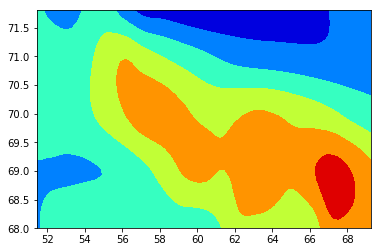

In [174]:
from scipy import interpolate



xU = interpolate.griddata(points, values, new_points);
xU.tofile("tmp.dat");
print(np.max(xU))

tmp = np.fromfile("tmp.dat", dtype=float, count=-1, sep='').reshape(Nx,Ny);
plt.contourf(Lon,Lat,tmp.reshape(Nx,Ny),cmap='jet');


In [180]:
print(Nx*Ny)

326040


In [186]:
tmp = np.fromfile("ForceY.dat", dtype=float, count=-1, sep='').reshape(Nx,Ny);
print(tmp.shape)

(715, 456)


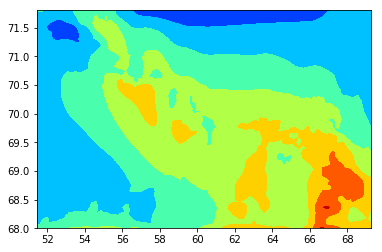

In [187]:
plt.contourf(Lon,Lat,tmp,cmap='jet')

In [ ]:
points = np.append(lon.reshape(num,1),lat.reshape(num,1),axis=1);
new_points = np.append(Lon.reshape(Nx*Ny,1),Lat.reshape(Nx*Ny,1),axis=1);

fxWind = open('xWind.dat', 'w+b');
fyWind = open('yWind.dat', 'w+b');
for it in np.arange(len(full_hours)): #len(full_hours) #len(full_hours)
    values = uv10[0,it,:].reshape(num);
    xU = interpolate.griddata(points, values, new_points);
    xU.tofile(fxWind);
    #fxWind.write(bytearray(xU)); #.reshape(Nx,Ny)
    
    values = uv10[1,it,:].reshape(num);
    yU = interpolate.griddata(points, values, new_points);
    yU.tofile(fyWind);
    #fyWind.write(bytearray(yU)); #.reshape(Nx,Ny)
#byte_arr = [120, 3, 255, 0, 100]
#binary_format = bytearray(byte_arr)
#f.write(binary_format)
fxWind.close();
fyWind.close()

(456, 715)


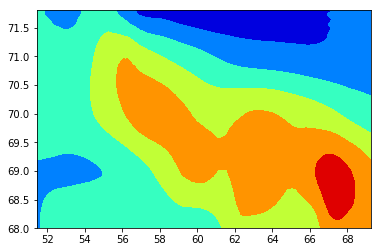

In [88]:
print(xU.shape)
plt.contourf(Lon,Lat,xU,cmap='jet');

In [66]:
lvl = 0;

lon = (fh.variables['XLONG'])[0,:,:]
lat = (fh.variables['XLAT'])[0,:,:]

lonN = len(lon[1,:]);
latN= len(lat[:,1]);

H = getvar(fh,"ter",meta=False); # Model Terrain Height

T2 = getvar(fh,"T2",timeidx=ALL_TIMES,meta=False) - 273.15; # Temperature in Celsius in 2 m
PSFC = getvar(fh,"PSFC",timeidx=ALL_TIMES,meta=False); # Surface pressure
uv10 = getvar(fh,"uvmet10",timeidx=ALL_TIMES,meta=False);
#v10 = getvar(fh,"V10",timeidx=ALL_TIMES,meta=False);
w10 = getvar(fh,"uvmet10_wspd_wdir",timeidx=ALL_TIMES,meta=False);

#WIND =  getvar(fh, "uvmet_wspd_wdir",timeidx=ALL_TIMES);
#wnd_spd = WIND[0,:];
#wnd_dir = WIND[1,:];


#Temperature = getvar(fh,"tc",timeidx=ALL_TIMES,meta=False); # Temperature in Celsius
#Pressure = getvar(fh,"p",timeidx=ALL_TIMES,meta=False); # Full Model Pressure
#WindSpeed = getvar(fh,"wspd_wdir",timeidx=ALL_TIMES,meta=False); # Wind Speed and Direction (wind_from_direction) in Grid Coordinates

#U = getvar(fh,"ua",timeidx=ALL_TIMES,meta=False); # U-component of Wind on Mass Points
#V = getvar(fh,"va",timeidx=ALL_TIMES,meta=False); # V-component of Wind on Mass Points

z = getvar(fh, "z",msl=False,meta=False) # Model Height for Mass Grid
zmsl = getvar(fh, "z",meta=False) # Model Height for Mass Grid
zstag = getvar(fh, "zstag",msl=False,meta=False) # Model Height for Vertically Staggered Grid

full_hours = getvar(fh,"xtimes",timeidx=ALL_TIMES,meta=False)/60;

#R = (fh.variables['QRAIN'])
#Sn = R = (fh.variables['QSNOW'])


#zN = len([0,:,0,0])+1;

print('Number of time layers:',np.squeeze(times[:,1]).shape)
print('Horizontal size of area:',lonN,'x',latN)
#print('Number of vertical levels:',zN);
#print('Structure of variables:', U.shape)
print(full_hours)

print('Longitude: ',np.min(lon),np.max(lon));
print('Latitude: ',np.min(lat),np.max(lat));

Number of time layers: (48,)
Horizontal size of area: 69 x 39
[48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.
 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83.
 84. 85. 86. 87. 88. 89. 90. 91. 92. 93. 94. 95.]
Longitude:  51.058502 68.9415
Latitude:  68.219315 71.64058


In [13]:
#meteostation coordinates:
met_lat = 70.4333 
met_lon = 59.0833
met_name = "IM. E.K. FEDOROVA (20946)";

met_height = 12; # a. s. l.

met_i = nearest(np.squeeze(lat[:,1]),met_lat)
met_j = nearest(np.squeeze(lon[1,:]),met_lon)
print('Meteostation indices', met_i,met_j)
print('Meteostation model coordinates: lat=',lat[met_i,1],'lon=',lon[1,met_j])
print('Meteostation height above the sea:',H[met_i,met_j])

Meteostation indices 24 31
Meteostation model coordinates: lat= 70.4449 lon= 59.211044
Meteostation height above the sea: 10.702853


In [14]:
print(full_hours)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191.]


In [15]:
time_start = 0
time_end = 126

lvl = 0;

start_ind = nearest(full_hours,time_start)
end_ind = nearest(full_hours,time_end)

T_p = np.squeeze(T2[start_ind:end_ind+1,met_i,met_j]);

P_p = np.squeeze(PSFC[start_ind:end_ind+1,met_i,met_j]);

wind_vel = np.zeros(end_ind + 1 - start_ind);
wind_dir = np.zeros(end_ind + 1 - start_ind);


#for it in np.arange(start_ind,end_ind+1):
#    wind_vel[it - start_ind] = interplevel(wnd_spd[it,:,:,:], zmsl, met_height)[met_i,met_j];
#    wind_dir[it - start_ind] = interplevel(wnd_dir[it,:,:,:], zmsl, met_height)[met_i,met_j];

wind_vel = w10[0,start_ind:end_ind+1,met_i,met_j];
wind_dir = w10[1,start_ind:end_ind+1,met_i,met_j];

hours = full_hours[start_ind:end_ind+1];# - full_hours[start_ind]

print(hours)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126.]


In [16]:
import csv

real_wind = []
real_wind_dir = []
real_T2 = []
real_PSF = []
real_hours=[]
real_date=[]
#real_wind_err=[]

with open('Метеоданные.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile,delimiter=';')
    next(csvReader);
    for row in csvReader:
        real_date.append(row[0]);
        real_hours.append(row[1][0:-1]);
        real_T2.append(row[2]);
        real_PSF.append(row[4][0:-4]);
        if (row[5]=='calm.'):
            real_wind_dir.append('0');
            real_wind.append('0'); 
        else:
            real_wind_dir.append(row[5][0:3]);
            real_wind.append(row[6]); 
            
        #real_wind_err.append(row[6]);
    #print(real_date,real_hours,real_T2,real_PSF,real_wind_dir,real_wind)
csvDataFile.close()
        
real_wind = np.array(real_wind).astype(np.double)*5.0/18.0;
real_wind_dir = np.array(real_wind_dir).astype(np.double)
#real_wind_err = np.array(real_wind_err).astype(np.double)
real_T2 = np.array(real_T2).astype(np.double)
real_PSF = np.array(real_PSF).astype(np.double)*100
real_hours = np.array(real_hours).astype(np.double)
dh = real_hours[1];
real_hours = np.arange(0,len(real_T2)*dh,dh);
print(real_hours)

[  0.   3.   6.   9.  12.  15.  18.  21.  24.  27.  30.  33.  36.  39.
  42.  45.  48.  51.  54.  57.  60.  63.  66.  69.  72.  75.  78.  81.
  84.  87.  90.  93.  96.  99. 102. 105. 108. 111. 114. 117. 120. 123.
 126. 129. 132. 135. 138. 141. 144. 147. 150. 153. 156. 159. 162. 165.
 168. 171. 174. 177. 180. 183. 186. 189. 192. 195. 198. 201. 204. 207.
 210. 213. 216. 219. 222. 225. 228. 231. 234. 237. 240. 243. 246. 249.
 252. 255. 258. 261.]


In [17]:
#painting for meteostation
t0 = 0;
tN = 192;

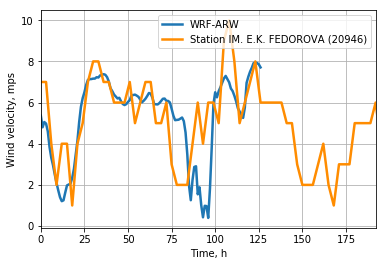

In [18]:
plt.grid(True)
plt.plot(hours,wind_vel,linewidth=2.5,label = 'WRF-ARW');
plt.errorbar(real_hours,real_wind,linewidth=2.5,label = 'Station ' + met_name, color='darkorange', ecolor='orange');
plt.ylabel('Wind velocity, mps')
plt.xlabel('Time, h')
#plt.plot(real_hours,real_wind,linewidth=2.5,label = 'Данные метеостанции Тикси');
#plt.ylabel('Скорость ветра, м/с')
#plt.xlabel('Время, ч')
plt.xlim(t0,tN)
#plt.xticks(np.arange(0,45,3), ('0','3','6','9','12','15','18','21','0','3','6','9','12','15','18'))
Name = Pic_name + '_vel'
plt.legend()
#plt.annotate("29.09",xy=[.06, 0.03],xycoords='figure fraction', fontweight='bold')
#plt.annotate("30.09",xy=[.57, 0.15],xycoords='figure fraction', fontweight='bold')
save(Name)

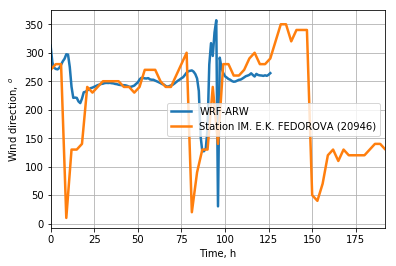

In [19]:
plt.grid(True)
plt.plot(hours,wind_dir,linewidth=2.5,label = 'WRF-ARW');
plt.plot(real_hours,real_wind_dir,linewidth=2.5,label = 'Station ' + met_name);
plt.ylabel('Wind direction, $^o$')
plt.xlabel('Time, h')
#plt.plot(real_hours,real_wind,linewidth=2.5,label = 'Данные метеостанции Тикси');
#plt.ylabel('Скорость ветра, м/с')
#plt.xlabel('Время, ч')
plt.xlim(t0,tN)
Name = Pic_name + '_vel'
plt.legend()
save(Name)

(127,) (127,)


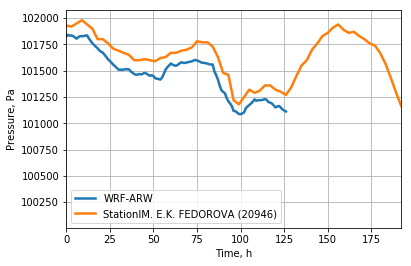

In [20]:
plt.grid(True)
print(hours.shape,P_p.shape)
plt.plot(hours,P_p,linewidth=2.5, label = 'WRF-ARW');
plt.plot(real_hours,real_PSF,linewidth=2.5,label = 'Station' + met_name);
plt.ylabel('Pressure, Pa')
plt.xlabel('Time, h')
#plt.plot(real_hours,real_PSF,linewidth=2.5,label = 'Данные метеостанции Тикси');
#plt.ylabel('Давление, Па')
#plt.xlabel('Время, ч')
plt.xlim(t0,tN)
#plt.xticks(np.arange(0,45,3), ('0','3','6','9','12','15','18','21','0','3','6','9','12','15','18'))
Name = Pic_name + '_press'
plt.legend()
#plt.annotate("29.09",xy=[.12, 0.03],xycoords='figure fraction', fontweight='bold')
#plt.annotate("30.09",xy=[.59, 0.15],xycoords='figure fraction', fontweight='bold')
save(Name)

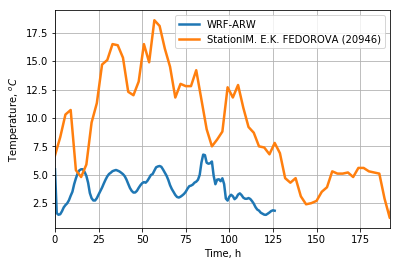

In [21]:
plt.grid(True)
plt.plot(hours,T_p,linewidth=2.5,label = 'WRF-ARW');
plt.plot(real_hours,real_T2,linewidth=2.5,label = 'Station' + met_name);
plt.ylabel('Temperature, $^oC$')
plt.xlabel('Time, h')
#plt.plot(real_hours,real_T2,linewidth=2.5,label = 'Данные метеостанции Тикси');
#plt.ylabel('Температура, $^oC$')
#plt.xlabel('Время, ч')
plt.xlim(t0,tN)
#plt.xticks(np.arange(0,45,3), ('0','3','6','9','12','15','18','21','0','3','6','9','12','15','18'))
Name = Pic_name + '_t2'
plt.legend()
#plt.annotate("29.09",xy=[.08, 0.03],xycoords='figure fraction', fontweight='bold')
#plt.annotate("30.09",xy=[.57, 0.15],xycoords='figure fraction', fontweight='bold')
save(Name)

In [547]:
WTHeight = 100.;

lvl = 0;
u = U[:,lvl,:,:];
v = V[:,lvl,:,:];
w = WindSpeed[0,:,0,:,:]
#print(np.arange(0,t_Num))
for it in np.arange(0,t_Num):
    w[it,] = interplevel(WindSpeed[0,it,:,:,:], z, WTHeight);
T = Temperature[:,lvl,:,:];
p = Pressure[:,lvl,:,:];

u = u/ np.sqrt(u**2 + v**2);
v = v/ np.sqrt(u**2 + v**2);


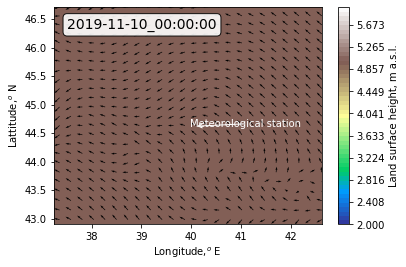

In [548]:
#hour = 24+3
hour = 0
name = Area + str(hour)
it0= nearest(hours,hour) 
it = it0+ start_ind;

fig, ax = plt.subplots()

plt.contourf(lon,lat,H,np.linspace(2,H.max()+1, 50),cmap='terrain');
#plt.colorbar(label='Уровни поверхности суши, м.') # Add a colorbar to a plot
plt.colorbar(label='Land surface height, m a.s.l.') # Add a colorbar to a plot

#plt.xlim([128.4,129.8]);
#plt.ylim([71.2,71.8]);

#plt.xlabel('Долгота, град. в.д.');
#plt.ylabel('Широта, град. с.ш.');

plt.xlabel('Longitude,$^o$ E');
plt.ylabel('Lattitude,$^o$ N');

#plt.quiver(lon,lat,u[it,:,:],v[it,:,:]);
plt.quiver(lon[1:len(lon):2,1:len(lat):2],lat[1:len(lon):2,1:len(lat):2],
           u[it,1:len(lon):2,1:len(lat):2], v[it,1:len(lon):2,1:len(lat):2])

dlon = 0.1
dlat = 0.01

#plt.annotate("Метеостанция", xy=(met_lon, met_lat), xytext=(met_lon-dlon, met_lat-dlat),arrowprops=dict(arrowstyle="->",color='white'),color='white')
plt.annotate("Meteorological station", xy=(met_lon, met_lat), xytext=(met_lon-dlon, met_lat-dlat),arrowprops=dict(arrowstyle="->",color='white'),color='white')

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.9)

# place a text box in upper left in axes coords
plt.text(0.05, 0.95, (times[it,:].tostring()).decode('utf-8'), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

save(name)

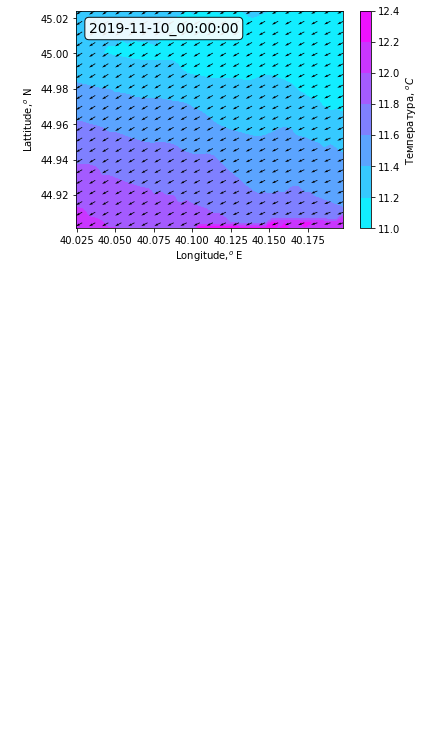

In [479]:
#hour = 24+3
hour = 0
name = 'tiksi_temp_' + str(hour)
it0= nearest(hours,hour) 
#it = it0 + start_ind;
#it = 10;

fig, ax = plt.subplots()

plt.contourf(lon,lat,T[it,:,:],cmap='cool');#,np.linspace(-2,2, 11)
plt.colorbar(label='Температура, $^oC$') # Add a colorbar to a plot

#plt.xlim([128.4,129.8]);
#plt.ylim([71.2,71.8]);

#plt.xlabel('Долгота, град. в.д.');
#plt.ylabel('Широта, град. с.ш.');

plt.xlabel('Longitude,$^o$ E');
plt.ylabel('Lattitude,$^o$ N');

plt.quiver(lon[1:len(lon):2,1:len(lat):2],lat[1:len(lon):2,1:len(lat):2],
          u[it,1:len(lon):2,1:len(lat):2], v[it,1:len(lon):2,1:len(lat):2])

dlon = 0.1
dlat = 0.01

#plt.arrow(met_lon - dlon,met_lat - dlat,dlon,dlat)
#plt.annotate("Метеостанция", xy=(met_lon, met_lat), xytext=(met_lon-dlon, met_lat-dlat),arrowprops=dict(arrowstyle="->",color='white'),color='white')
plt.annotate("Meteorological station", xy=(met_lon, met_lat), xytext=(met_lon-dlon, met_lat-dlat),arrowprops=dict(arrowstyle="->",color='white'),color='white')

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.9)

# place a text box in upper left in axes coords
plt.text(0.05, 0.95, (times[it,:].tostring()).decode('utf-8'), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
save(name)

In [480]:
import csv

wtLon = []
wtLat = []
wt_i = []
wt_j= []

with open('WF_coord.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        wtLat.append(row[0])
        wtLon.append(row[1])
        wt_i.append(nearest(np.squeeze(lat[:,1]),np.double(row[0])))
        wt_j.append(nearest(np.squeeze(lon[1,:]),np.double(row[1])))
        
wtLon = np.array(wtLon).astype(np.double)
wtLat = np.array(wtLat).astype(np.double)
print(wt_i[0],wt_j[0])
print(wt_i[1],wt_j[1])
print(wt_i[2],wt_j[2])

def draw_WindFarms(ax,radius=0.004,color='b',wf_list=np.arange(0,len(wtLon))):
    axx = ax.get_xlim();
    axy = ax.get_ylim();
    #radius = 0.004;
    rx = radius;
    ry = rx*(m.fabs(axy[0] - axy[1]))/(m.fabs(axx[0] - axx[1]));
    for i in wf_list:
        circle = matplotlib.patches.Ellipse([wtLon[i], wtLat[i]], rx, ry, color=color)
        ax.add_artist(circle)

10 24
24 26
9 18


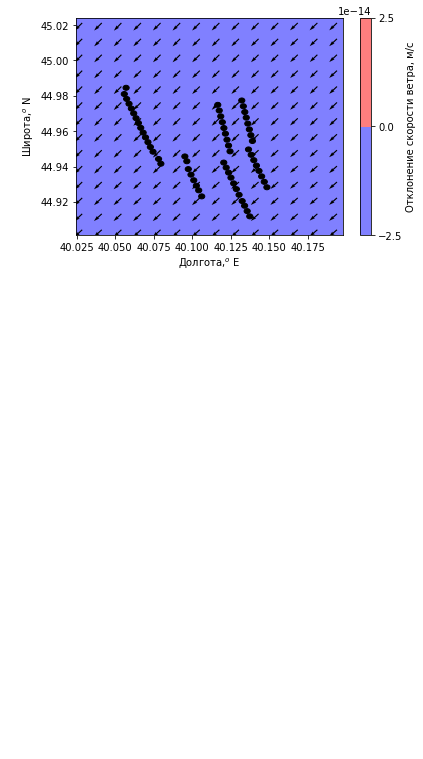

In [481]:
hour = 85
name = Area + 'windDistr_' + str(hour)
it0= nearest(hours,hour) 
it = it0+ start_ind;


fig, ax = plt.subplots()

plt.contourf(lon,lat,w3[it,:,:],cmap='bwr');

plt.colorbar(label='Отклонение скорости ветра, м/с') # Add a colorbar to a plot


plt.xlabel('Долгота,$^o$ E');
plt.ylabel('Широта,$^o$ N');

#plt.xlabel('Longitude,$^o$ E');
#plt.ylabel('Lattitude,$^o$ N');

dvel = 3;

plt.quiver(lon[1:len(lon):dvel,1:len(lat):dvel],lat[1:len(lon):dvel,1:len(lat):dvel],
           u[it,1:len(lon):dvel,1:len(lat):dvel], v[it,1:len(lon):dvel,1:len(lat):dvel])


#plt.xlim([128.72,128.85]);
#plt.ylim([71.64,71.66]);

dlon = 0.1
dlat = 0.01

plt.annotate("Meteorological station", xy=(met_lon, met_lat), xytext=(met_lon-dlon, met_lat-dlat),arrowprops=dict(arrowstyle="->",color='white'),color='white')

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.9)

# place a text box in upper left in axes coords
#plt.text(0.35, 0.95, (times[it,:].tostring()).decode('utf-8'), transform=ax.transAxes, fontsize=14,
#        verticalalignment='top', bbox=props)

draw_WindFarms(ax,color='black');

save(name)

In [482]:
#power = fh.variables['POWER']
power = getvar(fh,"POWER",timeidx=ALL_TIMES,meta=False);
#print(power)
lvl = 0

print(power.shape)
print('Max power is:',np.max(power[:,:,:]),'W')
#write_fo_file('check.dat',power[59,:,:]/1000)
#print(max(power[:,wt_i[0],wt_j[0]])/1000,max(w[:,wt_i[0],wt_j[0]]));
#print(max(power[:,wt_i[1],wt_j[1]])/1000,max(w[:,wt_i[1],wt_j[1]]));
#print(max(power[:,wt_i[2],wt_j[2]])/1000,max(w[:,wt_i[2],wt_j[2]]));

(145, 42, 42)
Max power is: 5024126.5 W


In [483]:
print(WindSpeed.shape)
w = WindSpeed[0,:,0,:,:]
print(w.shape)

(2, 145, 40, 42, 42)
(145, 42, 42)


In [484]:
TKE = getvar(fh,"TKE_PBL",timeidx=ALL_TIMES,meta=False);
#print(TKE.shape)
#print(zstag.shape)
lvl = 0;
tke = TKE[:,0,:,:]
#print(t_Num)
for it in np.arange(0,end_ind):
    tke[it,] = interplevel(TKE[it,:,:,:], zstag, WTHeight);

85


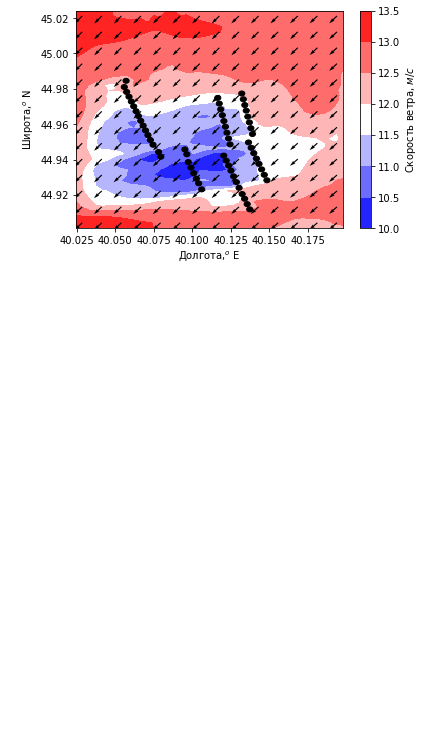

In [485]:
hour = 85
name = Area + 'windDistr_' + str(hour)
it0= nearest(hours,hour) 
it = it0+ start_ind;
print(it)

fig, ax = plt.subplots()

plt.contourf(lon,lat,w[it,:,:],cmap='bwr');

#plt.colorbar(label='Отклонение скорости ветра, $m^2/s^2$') # Add a colorbar to a plot
plt.colorbar(label='Скорость ветра, $м/с$') # Add a colorbar to a plot


plt.xlabel('Долгота,$^o$ E');
plt.ylabel('Широта,$^o$ N');

#plt.xlabel('Longitude,$^o$ E');
#plt.ylabel('Lattitude,$^o$ N');

dvel = 3;

plt.quiver(lon[1:len(lon):dvel,1:len(lat):dvel],lat[1:len(lon):dvel,1:len(lat):dvel],
          u[it,1:len(lon):dvel,1:len(lat):dvel], v[it,1:len(lon):dvel,1:len(lat):dvel])


#plt.xlim([128.72,128.85]);
#plt.ylim([71.64,71.66]);

dlon = 0.1
dlat = 0.01

plt.annotate("Meteorological station", xy=(met_lon, met_lat), xytext=(met_lon-dlon, met_lat-dlat),arrowprops=dict(arrowstyle="->",color='white'),color='white')

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.9)

# place a text box in upper left in axes coords
#plt.text(0.35, 0.95, (times[it,:].tostring()).decode('utf-8'), transform=ax.transAxes, fontsize=14,
#        verticalalignment='top', bbox=props)

draw_WindFarms(ax,color='black');

save(name)

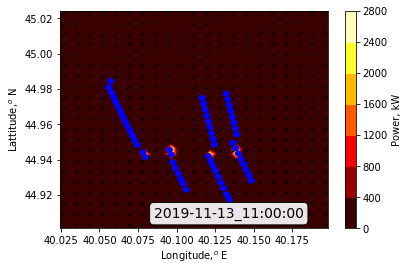

In [486]:
#hour = 24+3
hour = 83
name = Area + 'powerDistr_' + str(hour)
it0= nearest(hours,hour) 
it = it0+ start_ind;
#it = 0

fig, ax = plt.subplots()


#plt.contourf(lon,lat,wind_vel);
#plt.contourf(lon,lat,H,np.linspace(2,H.max()+1, 50),cmap='terrain', alpha=0.5,);
#plt.contourf(lon,lat,w[it,:,:],cmap='bwr');
#plt.colorbar(label='Скорость ветра, м/с') # Add a colorbar to a plot
plt.contourf(lon,lat,power[it,:,:]/1000,cmap='hot'); #,np.linspace(1,300*3, 10)
plt.colorbar(label='Power, kW');



#plt.colorbar(label='Уровни поверхности суши, м.') # Add a colorbar to a plot
#plt.colorbar(label='Power, kW') # Add a colorbar to a plot


#plt.xlabel('Долгота, град. в.д.');
#plt.ylabel('Широта, град. с.ш.');

plt.xlabel('Longitude,$^o$ E');
plt.ylabel('Lattitude,$^o$ N');

plt.quiver(lon[1:len(lon):2,1:len(lat):2],lat[1:len(lon):2,1:len(lat):2],
           u[it,1:len(lon):2,1:len(lat):2], v[it,1:len(lon):2,1:len(lat):2])

dlon = 0.1
dlat = 0.01

#plt.arrow(met_lon - dlon,met_lat - dlat,dlon,dlat)
#plt.annotate("Метеостанция", xy=(met_lon, met_lat), xytext=(met_lon-dlon, met_lat-dlat),arrowprops=dict(arrowstyle="->",color='white'),color='white')
#plt.annotate("Meteorological station", xy=(met_lon, met_lat), xytext=(met_lon-dlon, met_lat-dlat),arrowprops=dict(arrowstyle="->",color='white'),color='white')

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.9)

# place a text box in upper left in axes coords
plt.text(0.35, 0.1, (times[it,:].tostring()).decode('utf-8'), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

draw_WindFarms(ax);

#plt.xlim([128.72,128.85]);
#plt.ylim([71.64,71.66]);



#plt.xlim([40.03,40.2])
#plt.ylim([44.9,45])

#save(name)

In [487]:
lvl = 0;
sp = 0;
for i in np.arange(0,len(wtLon)):
    sp = sp + w[:,wt_i[i],wt_j[i]];
sp = sp/len(wtLon);
#sp = (uh**2 + vh**2)**(0.5)

(127,) (145,)


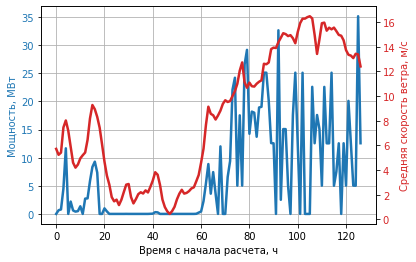

In [488]:
p = np.sum(np.sum(power,2),1)[start_ind:end_ind+1]
speed = sp[start_ind:end_ind+1]
p = p/1000;

y1Name = 'Мощность, МВт';
xaxisName = 'Время с начала расчета, ч'
y2Name = 'Средняя скорость ветра, м/с';

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.grid(True)
ax1.plot(hours,p/1000,linewidth=2.5,color=color);
ax1.set_ylabel(y1Name,color=color)
ax1.set_xlabel(xaxisName)
#ax1.set_xlim(0,42)
#ax1.set_xticks(np.arange(0,45,3));
#ax1.set_xticklabels(['0','3','6','9','12','15','18','21','0','3','6','9','12','15','18'])
ax1.tick_params(axis='y', labelcolor=color)
#ax1.legend(loc=0)

color = 'tab:red'
ax2 = ax1.twinx() 
print(hours.shape,sp.shape)
ax2.plot(hours,speed,linewidth=2.5,label = 'Average Wind Velocity',color=color);
#ax2.legend(loc=0)
ax2.set_ylabel(y2Name,color=color)
ax2.tick_params(axis='y', labelcolor=color)
#plt.plot(real_hours,real_wind,linewidth=2.5,label = 'Tiksi meteorological station');

#plt.plot(real_hours,real_wind,linewidth=2.5,label = 'Данные метеостанции Тикси');
#plt.ylabel('Скорость ветра, м/с')
#plt.xlabel('Время, ч')

Name = Area + '_powerCurve'
#plt.legend()
#plt.annotate("29.09",xy=[.06, 0.03],xycoords='figure fraction', fontweight='bold')
#plt.annotate("30.09",xy=[.57, 0.15],xycoords='figure fraction', fontweight='bold')
save(Name)

In [29]:
hour = 0
it0= nearest(hours,hour) 
it = it0+ start_ind;

lvl = 1;
Var = T2[it,:,:] - 273.15
#R[it,lvl,:,:]
print(np.max(R[it,lvl,:,:]))

fig, ax = plt.subplots()

plt.contourf(lon,lat,Var)#,np.linspace(2,Var.max()+1, 50),cmap='terrain');
plt.colorbar(label='Уровни поверхности суши, м.') # Add a colorbar to a plot

#plt.xlim([128.4,129.8]);
#plt.ylim([71.2,71.8]);

plt.xlabel('Долгота, град. в.д.');
plt.ylabel('Широта, град. с.ш.');

#plt.quiver(lon[,lat,u[it,:,:],v[it,:,:]);
print(lon[np.arange(1,len(lon),2),np.arange(1,len(lat),2)])
plt.quiver(lon[1:len(lon):2,1:len(lat):2],lat[1:len(lon):2,1:len(lat):2],
           u[it,1:len(lon):2,1:len(lat):2], v[it,1:len(lon):2,1:len(lat):2])
#plt.quiver(lon,lat, u[it,:,:], v[it,:,:])

dlon = 0.1
dlat = 0.01

#plt.arrow(met_lon - dlon,met_lat - dlat,dlon,dlat)
plt.annotate("Метеостанция", xy=(met_lon, met_lat), xytext=(met_lon-dlon, met_lat-dlat),arrowprops=dict(arrowstyle="->",color='red'),color='white')

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.9)

# place a text box in upper left in axes coords
plt.text(0.05, 0.95, times[it,:].tostring(), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

save('tmp')

NameError: name 'R' is not defined

In [ ]:
print(LANDMASK.shape)

In [ ]:
LANDMASK = (fh.variables['LU_INDEX'])[1,:,:]
plt.contourf(lon,lat,LANDMASK)

In [ ]:
a = np.array([1, 2, 3])

In [ ]:
b = np.array([0, 1, 0])

In [489]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
#import cartopy.crs as crs
#from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset

from wrf import to_np, getvar, CoordPair, vertcross


In [490]:
def distance_(x1,y1,x2,y2,x0,y0):
    return abs((y2-y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)/m.sqrt((y2 - y1)**2 + (x2 - x1)**2);

In [491]:
step_ext = 0.001;

lon_start0 = 40.056 - step_ext;
lat_start0 = 44.981 + step_ext;

lon_end0 = 40.0729 + step_ext;
lat_end0 = 44.951 - step_ext;

40.056008 44.981
40.072923 44.951034


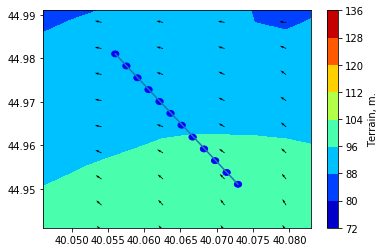

In [499]:
it= 50;
wf_list = [];
for i in np.arange(0,len(wtLon)):
    if (distance_(lon_start0,lat_start0,lon_end0,lat_end0,wtLon[i],wtLat[i]) < 1e-3):
        #print(i);
        #wf_list.append(i)
        if (wtLon[i] > min(lon_start0,lon_end0) and wtLon[i] < max(lon_start0,lon_end0) and wtLat[i] > min(lat_start0,lat_end0) and wtLat[i] < max(lat_start0,lat_end0)):
            wf_list.append(i)
            #print("!",i)
lon_start = min(wtLon[wf_list]);
lat_start = max(wtLat[wf_list]);

lon_end = max(wtLon[wf_list]);
lat_end = min(wtLat[wf_list]);

fig, ax = plt.subplots()

plt.contourf(lon,lat,H,cmap='jet'); #,np.linspace(1,300*3, 10) ,cmap='hot'
plt.colorbar(label='Terrain, m.');
plt.quiver(lon[1:len(lon):2,1:len(lat):2],lat[1:len(lon):2,1:len(lat):2],
           u[it,1:len(lon):2,1:len(lat):2], v[it,1:len(lon):2,1:len(lat):2])

plt.plot([lon_start,lon_end],[lat_start,lat_end]);

plt.xlim([min(wtLon[wf_list]) - 0.01,max(wtLon[wf_list]) + 0.01]);
plt.ylim([min(wtLat[wf_list]) - 0.01,max(wtLat[wf_list]) + 0.01])
draw_WindFarms(ax,wf_list=wf_list,radius=0.001);
print(lon_start,lat_start);
print(lon_end,lat_end);

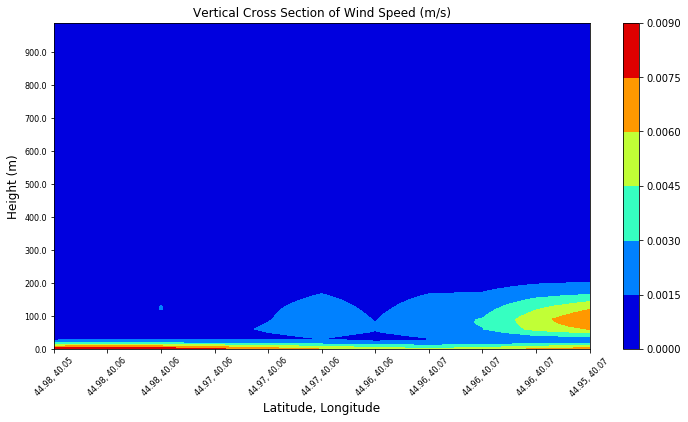

In [500]:
#hour = 85
#name = Area + 'windDistr_' + str(hour)
#nearest(hours,hour) 
v_height = 1000;

# Extract the model height and wind speed
z = getvar(fh, "zstag",msl=False);

#zstag = getvar(fh, "zstag",msl=False,meta=False) # Model Height for Vertically Staggered Grid
wspd =  TKE[it,:]; #wnd_spd [it ,:]

# Create the start point and end point for the cross section
start_point = CoordPair(lat=lat_start, lon=lon_start);
end_point = CoordPair(lat=lat_end, lon=lon_end);

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.
wspd_cross = vertcross(wspd, z, wrfin=fh, start_point=start_point, levels=np.arange(0,v_height,10),
                       end_point=end_point, latlon=True, meta=True);

# Create the figure
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

# Make the contour plot
wspd_contours = ax.contourf(to_np(wspd_cross), cmap=get_cmap("jet"))

# Add the color bar
plt.colorbar(wspd_contours, ax=ax)

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(wspd_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])

x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]

stepx = 1;
stepy = 10;

ax.set_xticks(x_ticks[::stepx])
ax.set_xticklabels(x_labels[::stepx], rotation=45, fontsize=8)

# Set the y-ticks to be height.
vert_vals = to_np(wspd_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax.set_yticks(v_ticks[::stepy])
ax.set_yticklabels(vert_vals[::stepy], fontsize=8)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=12)
ax.set_ylabel("Height (m)", fontsize=12)

plt.title("Vertical Cross Section of Wind Speed (m/s)")
#plt.ylim([0,3])

#for i in np.arange(len(xy_line)):
#    plt.plot([coord_pairs.shape[0]*xy_line[i],coord_pairs.shape[0]*xy_line[i]],[0,vert_vals.shape[0]*WTHeight/v_height],color='k');

plt.show()

[40.0541114807, 40.055809021, 40.0575065613, 40.0592002869, 40.0608978271, 40.0625953674, 40.064289093, 40.0659866333, 40.0676803589, 40.0693778992, 40.0710754395]
[44.9822387695, 44.9792327881, 44.9762420654, 44.973236084, 44.9702453613, 44.9672393799, 44.9642333984, 44.9612426758, 44.9582366943, 44.9552459717, 44.9522399902]


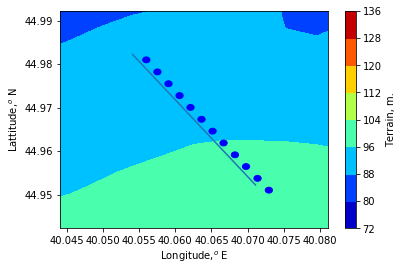

In [372]:
it = 0

tmp = [pair.latlon_str(fmt="{:.10f}, {:.10f}")
            for pair in to_np(coord_pairs)]
t_lon = [];
t_lat = [];
for i in np.arange(len(tmp)):
    #print(str(tmp[i].split(', ')));
    t_lon.append(float(tmp[i].split(', ')[1]));
    t_lat.append(float(tmp[i].split(', ')[0]));
print(t_lon);
print(t_lat)

fig, ax = plt.subplots()

plt.contourf(lon,lat,H,cmap='jet'); #,np.linspace(1,300*3, 10) ,cmap='hot'
plt.colorbar(label='Terrain, m.');

plt.xlabel('Longitude,$^o$ E');
plt.ylabel('Lattitude,$^o$ N');

plt.plot([t_lon[0],t_lon[-1]],[t_lat[0],t_lat[-1]]);

plt.xlim([t_lon[0] - 0.01,t_lon[-1] + 0.01]);
plt.ylim([t_lat[-1] - 0.01,t_lat[0] + 0.01])

draw_WindFarms(ax,wf_list=wf_list,radius=0.001);

xy_line = [];
dist = m.sqrt((t_lon[-1] - t_lon[0])**2 + (t_lat[-1] - t_lat[0])**2);
for i in wf_list:
    xy_line.append(m.sqrt((wtLon[i] - t_lon[0])**2 + (wtLat[i] - t_lat[0])**2)/dist);

In [356]:
print(xy_line)

[0.06572965217162692, 0.15314247043361678, 0.24260291419290717, 0.33270958298981484, 0.4228095177775984, 0.5131983521741461, 0.6036740750070911, 0.6941532048807685, 0.7851587655377504, 0.8750734473244065, 0.9663677619564736, 1.0572593637779455]


In [243]:
print(to_np(coord_pairs)[0])
lon_start = 40.056;
lat_start = 44.981;

lon_end = 40.0729;
lat_end = 44.951;

CoordPair(x=7.0, y=27.0, lat=44.98223876953125, lon=40.05411148071289)


In [493]:
wnd_spd =  getvar(fh, "uvmet_wspd_wdir",timeidx=ALL_TIMES)[0,:]

#w10 = getvar(fh,"wspd_wdir10",timeidx=ALL_TIMES,meta=False);
#print(wspd[1])

In [494]:
TKE = getvar(fh, "TKE_PBL",timeidx=ALL_TIMES)

In [496]:
print(TKE.shape)
print(wnd_spd.shape)

(145, 41, 42, 42)
(145, 40, 42, 42)


In [91]:
print(wtLon[6],wtLat[6])
print(zstag.shape)
print(zstag[:,wt_i[6],wt_j[6]])

40.056008 44.981
(41, 42, 42)
[0.0 9.870567321777344 22.659385681152344 39.217079162597656
 60.63982391357422 88.31800079345703 124.0112075805664 169.93487548828125
 228.86761474609375 304.25628662109375 400.497314453125 522.7886352539062
 676.4234008789062 866.5274658203125 1098.630126953125 1377.5906982421875
 1707.1029052734375 2089.25732421875 2524.02734375 3008.08349609375
 3535.288818359375 4107.7216796875 4727.39404296875 5397.119140625
 6119.14892578125 6894.97314453125 7727.20556640625 8617.6259765625
 9566.1298828125 10534.97265625 11470.3154296875 12383.35546875
 13286.603515625 14186.259765625 15081.44140625 15974.12109375
 16867.14453125 17764.458984375 18666.65234375 19570.955078125
 20475.91796875]
